<a href="https://colab.research.google.com/github/ReneSRuiz/Mineria_de_datos/blob/main/AvancePIA_II_001_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Equipo:** 11  
**Grupo:** 001  
**Frecuencia:** lunes  
**Integrantes:**

 *   García Alanís Alejandro Uriel 1886968
 *   Estrada Dávila Jorge Eduardo 1741943
 *   Paz Reyes Néstor Misael 1559508
 *   González García Elisa 1858207
 *   Sobrevilla Ruiz Rene 1941452  

**BASE DE DATOS PRINCIPAL**  
**1) Título de la base de datos**  
En nombre oficial de la base de datos es "Lichess September 2020 data", la cual se puede encontrar por el siguiente enlace: https://www.kaggle.com/noobiedatascientist/lichess-september-2020-data?select=Sept_20_analysis.csv  
**2) Introducción general**  
El ajedrez es un juego con muchos años de antigüedad, sencillo de entender pero con una dificultad estratégica muy interesante. Se cree que los grandes reyes y estrategas militares veían al ajedrez como una forma de estudiar a sus enemigos y mejorar como líderes. El ajedrez a tenido momentos importantes en la historia humana, desde juegos amistosos para generar alianzas entre reyes como el fin de épocas importantes como lo fué la primera victoria de un americano contra la URSS, país que dominaba este deporte en tiempos de guerra fría, significando una victoria moral para EUA.  
El ajedrez era un deporte de nicho, popular entre gente que buscaba un juego estratégico y gente que ama el análisis tan complejo de este. Pero en tiempos modernos, con estrenos de series muy famosas, ejemplo Gambito de Dama, este juego ha alcanzado una popularuidad muy alta. Ahora, no solamente las personas "inteligentes" lo juegan, sino que la persona común se ha animado a aprender de este juego tan impresionante y educativo.  
**3) Descripción de los datos**  
Los datos de la base seleccionada estan en una tabla. En total, son más de 3 millones de filas, y 40 columnas. Cada fila representa un enfrentamiento entre 2 personas y las columnas nos revelan varios datos, como el tipo de juego, el "elo" de los jugadores, la fecha del juego, resultados, momentos importantes, nombre de aperturas, movimientos y errores de ambos, entre otros. Hay datos tanto enteros, flotantes y objetos (cadenas de caracteres y fechas).  
**4) Justificación del uso de datos.**  
Muchos de los jugadores nuevos se sienten abrumados al empezar a estudiar aperturas, ya que hay cientos de estas y cada una requiere de bastante tiempo. Además, los jugadores mas avanzados, requieren siempre actualizar sus aperturas, es decir, dejar de jugar las que no tienen buenos resultados y aprender las más modernas o las "mejores" dentro de su "elo". Por lo anterior, utilizando los datos de nuestra base, podemos crear una clasificación de las mejores aperturas del ajedrez, dependiendo del "elo" de las personas, para ayudar a los novatos y a gente mas experimentada en el juego, a crear las mejores estrategias dependiendo del desempeño de las aperturas, asi como de gusto del jugador, y asi, poder estudiar el ajedrez de una manera más inteligente. 
**5) Objetivo final.**  
Nuestro objetivo principal es clasificar las mejores aperturas del ajedrez, dependiendo del "elo" que tengan los jugadores y la eficacia de estas aperturas para la creación de entrategias ganadoras.  
**6) Mencionar preguntas de interés.**  
Hay varias cosas interesantes que podemos indagar sobre esta base, como lo pueden ser:  
* ¿Se juegan más aperturas clásicas o modernas?  
* ¿El tiempo promedio de juego aumenta conforme el rival?, es decir, ¿Mientras mas "elo" tienen los rivales, mas largas son estas partidas?
* ¿Son igual de efectivas las aperturas populares entre la gente de "elo bajo" en los "elos altos"?  
* ¿Las aperturas favoritas de los "elos altos" son efectivas en los "elos bajos"?
* ¿Que tantas jugadas inadecuadas, meteduiras de patas o volteos de juego tiene un jugador de "low elo" comparado con los de mayor "elo"?  

**LIMPIEZA DE DATOS**  
Iniciaremos cargando los datos y mostrándolos sin manipular, además de que cargaremos las librerias necesarias para este apartado y los futuros.

In [ ]:
#importando las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Importar la base de datos al google colab
from google.colab import files
files.upload()

Saving Sept_20_analysis.csv to Sept_20_analysis.csv


In [ ]:
#Nuestros datos a trabajar son
df = pd.read_csv("Sept_20_analysis.csv")
#Visualizando tabla
df.head(5)

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Site,Termination,TimeControl,UTCTime,WhiteElo,WhiteRatingDiff,Black_elo_category,White_elo_category,starting_time,increment,Game_type,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0-1,https://lichess.org/hjb8FYm1,Time forfeit,300+0,00:00:00,1180,-7.0,Low rating,Low rating,300.0,0.0,Blitz,66,4,2,0,3,3,1,7,6,8,8,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,Réti Opening,0-1,https://lichess.org/Iz2fbHuE,Normal,300+0,00:00:00,1381,NaN,Low rating,Low rating,300.0,0.0,Blitz,64,2,1,1,1,7,5,10,7,0,0,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0-1,https://lichess.org/Cdj7flmY,Time forfeit,300+2,00:00:00,1485,-1.0,High rating,Low rating,300.0,2.0,Blitz,70,0,1,1,2,8,8,9,11,0,2,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0-1,https://lichess.org/WZQ9FEpD,Normal,180+2,00:00:00,2040,-11.0,Low rating,High rating,180.0,2.0,Blitz,86,4,2,1,5,3,4,8,11,18,0,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,1-0,https://lichess.org/ESlJl57U,Normal,600+0,00:00:00,2163,0.0,Low rating,High rating,600.0,0.0,Rapid,71,1,0,1,1,6,2,8,3,0,0,0,0,0,0,0,0,0,0,2,0


In [ ]:
#Vemos si hay datos nulos
df.isnull().sum()

GAME                        0
BlackElo                    0
BlackRatingDiff         13036
Date                        0
ECO                         0
Event                       0
Opening                     0
Result                      0
Site                        0
Termination                 0
TimeControl                 0
UTCTime                     0
WhiteElo                    0
WhiteRatingDiff         13057
Black_elo_category          0
White_elo_category          0
starting_time           10344
increment               10344
Game_type                   0
Total_moves                 0
Black_blunders              0
White_blunders              0
Black_mistakes              0
White_mistakes              0
Black_inaccuracies          0
White_inaccuracies          0
Black_inferior_moves        0
White_inferior_moves        0
Black_ts_moves              0
White_ts_moves              0
Black_ts_blunders           0
White_ts_blunders           0
Black_ts_mistakes           0
White_ts_m

Vemos que esta base de datos cuenta con bastante información interesante, pero en nuestro caso, nos enfocamos en movimientos, aperturas y los mismos errores de los jugadores, por lo que columnas como la diferencia de rating y la de los tiempos de juego no son de interés, además de que cuentan con datos nulos y nos quitaríamos un problema. Además de estas columnas, hay otras mas que no tienen mucha información, como el ID del juego o la fecha del mismo, por lo que igual se considerarian a eliminar. Entonces, con el criterio de eliminar columnas que no contengan información relevante, que no aportan a nuestros objetivos y que tengan datos nulos, procedemos a eliminar estas columnas, además de renombrar las que se conservan por temas de practicidad en el futuro. Además, realizaremos una copia de los datos en un CSV para alivianar el peso de la base de datos, ya que la original cuenta con bastantes datos, y aminorar el peso del mismo nos ayudará en un futuro.  
Para mayor profundidad, estas son las razones de las eliminaciones de las columnas:  
* **GAME, Date, Site:** Tanto fechas como ID del juego y el dónde encontrarlo no son importantes.  
* **BlackRatingDiff, WhiteRatingDiff:** Pueden sacarse a mano, además de que no aporta a nuestros objetivos.  
* **starting_time, increment, TimeControl:** Nos enfocamos a los movimientos, no al tiempo de juego de los jugadores.  
* **UTCTime, ECO:** No revela información importante para nuestros objetivos.  
* **Black_inferior_moves, White_inferior_moves, Black_ts_moves, White_ts_moves, Black_ts_blunders, White_ts_blunders, Black_ts_mistakes, White_ts_mistake, Black_long_moves, White_long_moves, Black_bad_long_moves, White_bad_long_moves, Game_flips_ts:** Nos enfocamos en los errores estándares.
* **Event:** Para eso está la columna de Game_Type.

In [ ]:
#Eliminación de columnas
df2=df.drop({'GAME','BlackRatingDiff','Date','ECO','Site','UTCTime','WhiteRatingDiff','starting_time','increment',
                 'Black_inferior_moves', 'White_inferior_moves', 'Black_ts_moves','White_ts_moves','Black_ts_blunders', 
                 'White_ts_blunders','TimeControl','Black_ts_mistakes', 'White_ts_mistake', 'Black_long_moves','White_long_moves',
                 'Black_bad_long_moves','Event', 'White_bad_long_moves','Game_flips_ts'},axis = 1 )
#Cambiaremos los nombres de inglés a español
df2=df2.rename(columns = {'Opening':'Apertura','Result':'Resultado','Termination':'Terminacion',
                                    'Black_elo_category':'Categoria_Negras',
                                    'White_elo_category':'Categoria_Blancas','Game_type':'Tipo_juego',
                                    'Total_moves':'Movimientos','Black_blunders':'Negras_Metedura_de_patas',
                                    'White_blunders':'Blancas_Metedura_de_patas','Black_mistakes':'Negras_Errores',
                                    'White_mistakes':'Blancas_Errores','Black_inaccuracies':'Negras_Imprecision',
                                    'White_inaccuracies':'Blancas_Imprecision','Game_flips':'Juego_Vueltas',})
#Guardar el archivo en un csv nuevo para futuros trabajos
df2.to_csv("Base_Principal_Modificada.csv", index=False)
df2.head(5)

,BlackElo,Apertura,Resultado,Terminacion,WhiteElo,Categoria_Negras,Categoria_Blancas,Tipo_juego,Movimientos,Negras_Metedura_de_patas,Blancas_Metedura_de_patas,Negras_Errores,Blancas_Errores,Negras_Imprecision,Blancas_Imprecision,Juego_Vueltas
0,1143,Bird Opening,0-1,Time forfeit,1180,Low rating,Low rating,Blitz,66,4,2,0,3,3,1,8
1,1504,Réti Opening,0-1,Normal,1381,Low rating,Low rating,Blitz,64,2,1,1,1,7,5,6
2,1933,Philidor Defense,0-1,Time forfeit,1485,High rating,Low rating,Blitz,70,0,1,1,2,8,8,5
3,1710,Sicilian Defense: Closed,0-1,Normal,2040,Low rating,High rating,Blitz,86,4,2,1,5,3,4,8
4,1598,Alekhine Defense,1-0,Normal,2163,Low rating,High rating,Rapid,71,1,0,1,1,6,2,2


El nombre de lo datos en formato de "cadenas de caracteres" se quedarán en su idioma original (inglés), debido a ser un lenguaje universal estandar dentro del ajedrez. A pesar de estar en su idioma, dentro de los análisis de traducirán según su conveniencia.  
**ESTADISTICA BÁSICA**  
Ahora realizaremos, de forma descriptiva, nuestra base de datos. Primero hablaremos de las columnas que tengan datos en forma de cadenas de caracteres, para después seguir con los numéricos, los cuales tendrán un análisis más profundo.

In [ ]:
#Por si se requiere volver a cargar los datos de la tabla modificada
from google.colab import files
files.upload()
df2 = pd.read_csv("Base_Principal_Modificada.csv")

Saving Base_Principal_Modificada.csv to Base_Principal_Modificada.csv


In [ ]:
df2['Apertura'].describe()

count                              617653
unique                               2536
top       Queen's Pawn Game: Mason Attack
freq                                12582
Name: Apertura, dtype: object

Vemos que en cuestión de aperturas, se registraron al menos 2,790 aperturas diferentes, de la cual, la mas jugada es "Queen's Pawn Game: Mason Attack".

In [ ]:
df2['Resultado'].describe()

count     3739909
unique          4
top           1-0
freq      1863894
Name: Resultado, dtype: object


In [ ]:
df2['Resultado'].unique()

array(['0-1', '1-0', '1/2-1/2', '*'], dtype=object)

En cuestión de los resultados, sabemos que estos son declarar un ganador, ya sea 0-1 (Gana negras) o 1-0 (Gana blancas), pero igualmente hay empates (1/2-1/2) y abandonos o juegos con fallos ('*'), y por lo que vemos, los resultados mencionan que las blancas ganan con mayor frecuencia.

In [ ]:
df2['Terminacion'].describe()

count     3739909
unique          4
top        Normal
freq      2869458
Name: Terminacion, dtype: object

In [ ]:
df2['Terminacion'].unique()

array(['Time forfeit', 'Normal', 'Rules infraction', 'Abandoned'],
      dtype=object)

De la mano con los resultados, la forma en como estos son determinados son importantes. Vemos que pueden ser por tiempo, de forma normal, por infracciones o abandonos, y que lo más frecuente es que se determine un ganador o empate de forma normal, es decir, con algún "JAQUE MATE", que algún jugador se rinda o que ambos pacten el empate.

In [ ]:
print(df2['Categoria_Blancas'].describe(),'\n')
print(df2['Categoria_Negras'].describe())

count        3739909
unique             3
top       Low rating
freq         2993539
Name: Categoria_Blancas, dtype: object 

count        3739909
unique             3
top       Low rating
freq         2991089
Name: Categoria_Negras, dtype: object


In [ ]:
df2['Categoria_Blancas'].unique()

array(['Low rating', 'High rating', 'GM rating'], dtype=object)

Recordando que los jugadores tienen categorías, estas van desde el "LOW RATING", "HIGH RATING" y "GM RATING", y vemos que, tanto jugadores de blancas como negras, se situan en el "LOW RATING", lo cual es de esperarse, ya que subir a los demas ratings requieren mayor expertis en el juego, y seguramente muchos de los jugadores lo hacen por hobbie.

In [ ]:
df2['Tipo_juego'].describe()

count     3739909
unique          5
top         Blitz
freq      1812120
Name: Tipo_juego, dtype: object

In [ ]:
df2['Tipo_juego'].unique()

array(['Blitz', 'Rapid', 'Bullet', 'Classical', 'Correspondence'],
      dtype=object)

Igualmente vemos que el modo/tipo de juego favorito es el "BLITZ", esto puede deberse a que este modo es rápido, y más amigable o interesante para los jugadores.  
Ahora pasaremos a los datos numéricos:

In [ ]:
print(df2['BlackElo'].describe(), '\n')
print('Varianza: ', df2['BlackElo'].var(), '\n')
print('Desviación estandar: ', df2['BlackElo'].std(), '\n')
print("Simetría de los datos:", df2['BlackElo'].skew(), "\n")
print("Curtosis", df2['BlackElo'].kurt())

count    3.739909e+06
mean     1.602300e+03
std      3.435793e+02
min      6.000000e+02
25%      1.354000e+03
50%      1.593000e+03
75%      1.841000e+03
max      3.957000e+03
Name: BlackElo, dtype: float64 

Varianza:  118046.76030488501 

Desviación estandar:  343.57933626003324 

Simetría de los datos: 0.1607547371835947 

Curtosis -0.24272112523246037


Vemos que el jugador de negras con menor elo es de 600 y el de mayor elo es de 3957, además la desviación estandar indica que hay mucha dispersión, por lo que los jugadores son muy variados. Además el coeficiente de simetría podría indicar que estos datos tienen algún tipo de simetría, por lo que podrían estar bien repartidos los jugadores, esto reforzado por la curtosis, que nos dice que muchos jugadores no se alejan de la media.

In [ ]:
print(df2['WhiteElo'].describe(), '\n')
print('Varianza: ', df2['WhiteElo'].var(), '\n')
print('Desviación estandar: ', df2['WhiteElo'].std(), '\n')
print("Simetría de los datos:", df2['WhiteElo'].skew(), "\n")
print("Curtosis", df2['WhiteElo'].kurt())

count    3.739909e+06
mean     1.601512e+03
std      3.435898e+02
min      6.000000e+02
25%      1.353000e+03
50%      1.592000e+03
75%      1.840000e+03
max      3.958000e+03
Name: WhiteElo, dtype: float64 

Varianza:  118053.94356861341 

Desviación estandar:  343.5897896745673 

Simetría de los datos: 0.15853401134895811 

Curtosis -0.24096420125435936


Vemos que el jugador de blancas con menor elo es de 600 y el de mayor elo es de 3958, además la desviación estandar indica que hay mucha dispersión, por lo que los jugadores son muy variados. Además el coeficiente de simetría podría indicar que estos datos tienen algún tipo de simetría, al igual que con los jugadores de negras, por lo que podrían estar bien repartidos los jugadores, esto reforzado por la curtosis, que nos dice que muchos jugadores no se alejan de la media.

In [ ]:
print(df2['Movimientos'].describe(), '\n')
print('Varianza: ', df2['Movimientos'].var(), '\n')
print('Desviación estandar: ', df2['Movimientos'].std(), '\n')
print("Simetría de los datos:", df2['Movimientos'].skew(), "\n")
print("Curtosis", df2['Movimientos'].kurt())

count    3.739909e+06
mean     6.402238e+01
std      2.672077e+01
min      1.000000e+00
25%      4.600000e+01
50%      5.900000e+01
75%      7.700000e+01
max      3.530000e+02
Name: Movimientos, dtype: float64 

Varianza:  713.9995436050986 

Desviación estandar:  26.720769891698453 

Simetría de los datos: 1.2389245621873834 

Curtosis 2.53195619347439


Vemos que hay juegos que solamente hubo 1 movimiento, popsiblemente ganando blancas por abandono, y juegos más largos de hasta 353 movimientos. Además, el coeficiente de simetría indica que hay asimetría positiva, por lo que los juegos con "muchos" movimientos son los menos frecuentes, además, la curtosis indica que muchos de los juegos tienen muvimientos alejados de la media, el cual es 64 movimientos por fuejo, por lo que podríamos esperar que hay tanto juegos que terminan muy rápido como juegos que se alargan, habiendo variedad en los mismos.

In [ ]:
print(df2['Negras_Metedura_de_patas'].describe(), '\n')
print('Varianza: ', df2['Negras_Metedura_de_patas'].var(), '\n')
print('Desviación estandar: ', df2['Negras_Metedura_de_patas'].std(), '\n')
print("Simetría de los datos:", df2['Negras_Metedura_de_patas'].skew(), "\n")
print("Curtosis", df2['Negras_Metedura_de_patas'].kurt(),'\n\n\n')
print(df2['Blancas_Metedura_de_patas'].describe(), '\n')
print('Varianza: ', df2['Blancas_Metedura_de_patas'].var(), '\n')
print('Desviación estandar: ', df2['Blancas_Metedura_de_patas'].std(), '\n')
print("Simetría de los datos:", df2['Blancas_Metedura_de_patas'].skew(), "\n")
print("Curtosis", df2['Blancas_Metedura_de_patas'].kurt())

count    3.739909e+06
mean     2.042054e+00
std      1.961390e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.200000e+01
Name: Negras_Metedura_de_patas, dtype: float64 

Varianza:  3.847050449537979 

Desviación estandar:  1.9613899279689337 

Simetría de los datos: 1.674330907406602 

Curtosis 4.876140396669593 



count    3.739909e+06
mean     2.021308e+00
std      1.974633e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.600000e+01
Name: Blancas_Metedura_de_patas, dtype: float64 

Varianza:  3.899174237081576 

Desviación estandar:  1.974632684091291 

Simetría de los datos: 1.675853812170047 

Curtosis 4.8391136230259 





En cuestión de las "Meteduras de patas", estas parecen comportarse de manera similar tanto para blancas como negras. Ambos tienen disviaciones muy pequeñas y mínimos de 0 "Meteduras de patas", pero el máximo de "meteduras de patas" de negras y blancas son de 39 y 36 respectivamente. Además, en ambos casos cuentan con asimetría positiva y curtosis demasiado altas, por lo que los juegos, por lo general, deben tener pocas "meteduras de pata", miestras que los juegos que tienen grandes cantidades, como 36 o 39 "meteduras de patas", son juegos muy atípicos.

In [ ]:
print(df2['Negras_Errores'].describe(), '\n')
print('Varianza: ', df2['Negras_Errores'].var(), '\n')
print('Desviación estandar: ', df2['Negras_Errores'].std(), '\n')
print("Simetría de los datos:", df2['Negras_Errores'].skew(), "\n")
print("Curtosis", df2['Negras_Errores'].kurt(),'\n\n\n')
print(df2['Blancas_Errores'].describe(), '\n')
print('Varianza: ', df2['Blancas_Errores'].var(), '\n')
print('Desviación estandar: ', df2['Blancas_Errores'].std(), '\n')
print("Simetría de los datos:", df2['Blancas_Errores'].skew(), "\n")
print("Curtosis", df2['Blancas_Errores'].kurt())

count    3.739909e+06
mean     3.081397e+00
std      2.334158e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.800000e+01
Name: Negras_Errores, dtype: float64 

Varianza:  5.448291348161977 

Desviación estandar:  2.334157524281936 

Simetría de los datos: 0.9773190867942845 

Curtosis 1.2462225923675274 



count    3.739909e+06
mean     3.070554e+00
std      2.347220e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      3.900000e+01
Name: Blancas_Errores, dtype: float64 

Varianza:  5.509439656787787 

Desviación estandar:  2.3472195587093654 

Simetría de los datos: 0.9782795202378635 

Curtosis 1.231731956408097 





De igual manera que con las "Meteduras de patas", los "errores" estas parecen comportarse de manera similar tanto para blancas como negras. Ambos tienen disviaciones muy pequeñas y mínimos de 0 "errores" , pero el máximo de "errores"  de negras y blancas son de 39 y 40 respectivamente. Además, en ambos casos cuentan con asimetría positiva y curtosis ligeramente elevadas, por lo que los juegos, por lo general, deben tener pocos "errores" , miestras que los juegos que tienen grandes cantidades, como 39 o 40 "errores" , son juegos muy atípicos.

In [ ]:
print(df2['Negras_Imprecision'].describe(), '\n')
print('Varianza: ', df2['Negras_Imprecision'].var(), '\n')
print('Desviación estandar: ', df2['Negras_Imprecision'].std(), '\n')
print("Simetría de los datos:", df2['Negras_Imprecision'].skew(), "\n")
print("Curtosis", df2['Negras_Imprecision'].kurt(),'\n\n\n')
print(df2['Blancas_Imprecision'].describe(), '\n')
print('Varianza: ', df2['Blancas_Imprecision'].var(), '\n')
print('Desviación estandar: ', df2['Blancas_Imprecision'].std(), '\n')
print("Simetría de los datos:", df2['Blancas_Imprecision'].skew(), "\n")
print("Curtosis", df2['Blancas_Imprecision'].kurt())

count    3.739909e+06
mean     2.893094e+00
std      2.035020e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.300000e+01
Name: Negras_Imprecision, dtype: float64 

Varianza:  4.141308381840579 

Desviación estandar:  2.0350204868355943 

Simetría de los datos: 0.9051260324627162 

Curtosis 1.1415605305994512 



count    3.739909e+06
mean     2.794539e+00
std      2.039361e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.700000e+01
Name: Blancas_Imprecision, dtype: float64 

Varianza:  4.158993705566677 

Desviación estandar:  2.039361102298138 

Simetría de los datos: 0.9256483983264125 

Curtosis 1.1568794000626546 





Al igual que con los anteriores movimientos, las "impresiciones" parecen comportarse de manera similar tanto para blancas como negras. Ambos tienen disviaciones muy pequeñas y mínimos de 0 "impresiciones", pero el máximo de "impresiciones"  de negras y blancas son de 23 y 27 respectivamente. Además, en ambos casos cuentan con asimetría positiva y curtosis ligeramente elevadas, por lo que los juegos, por lo general, deben tener pocos "impresiciones", miestras que los juegos que tienen grandes cantidades, como 39 o 40 "impresiciones", son juegos muy atípicos.

In [ ]:
print(df2['Juego_Vueltas'].describe(), '\n')
print('Varianza: ', df2['Juego_Vueltas'].var(), '\n')
print('Desviación estandar: ', df2['Juego_Vueltas'].std(), '\n')
print("Simetría de los datos:", df2['Juego_Vueltas'].skew(), "\n")
print("Curtosis", df2['Juego_Vueltas'].kurt())

count    3.739909e+06
mean     6.251911e+00
std      4.739733e+00
min      0.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      9.000000e+00
max      8.300000e+01
Name: Juego_Vueltas, dtype: float64 

Varianza:  22.465073515142542 

Desviación estandar:  4.739733485665892 

Simetría de los datos: 1.2683948770567326 

Curtosis 2.270590063811904


Por último, analizaremos las veces que el juego cambió de lado, es decir, cuando un jugador que tenía las de perder, logra tomar ventaja. En este caso, igualmente hay juegos dominados por 1 bando, es decir, 0 cambios de ventaja, y hay juegos donde cambiaron papeles hasta 83 veces. Vemos que la desviación estandar es poca, que hay asimetría positiva y la curtosis es muy alta, por lo que da indicios de que los juegos con varios cambios de ventajas, ya sea mas de 60 o 70 veces, son realmente atípicos, y que la mayoría puede que ronde entre unas 6 veces el cambio de ventajas o de posiciones ganadoras.  
Con esto, damos por terminado la parte descriptiva, ahora veremos gráficas diversas que nos pueden aportar una mejor visualización de la información.  
**GRÁFICAS**  
Lo primero que nos interesaría conocer es la distribución de nuestra población, es decir, como estan distribuidos los jugadores, tanto de negras como blancas, con respecto a su categoría. Para esto, utilizamos una gráfica de pastel:

([<matplotlib.patches.Wedge at 0x7fb6be856f50>,
 [Text(-0.896905524246673, 0.6368363059498107, 'Low rating'),
  Text(0.8763902867096585, -0.6647857289089192, 'High rating'),
  Text(1.0994536186513588, -0.034666128056541456, 'GM rating')],
 [Text(-0.48922119504363976, 0.3473652577908058, '80.3 %'),
  Text(0.47803106547799545, -0.3626103975866831, '18.7 %'),
  Text(0.599701973809832, -0.018908797121749883, '1.0 %')])

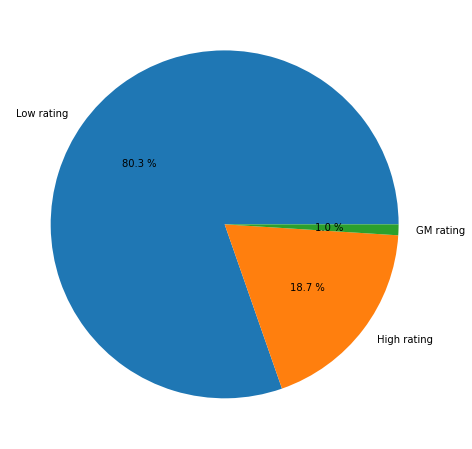

In [ ]:
Blancas = (df2[df2['Categoria_Blancas'] == 'Low rating']['Categoria_Blancas'].count() ,df2[df2['Categoria_Blancas'] == 'High rating']['Categoria_Blancas'].count() ,df2[df2['Categoria_Blancas'] == 'GM rating']['Categoria_Blancas'].count() )
NombreB = ('Low rating','High rating','GM rating')
plt.figure(figsize=(8,8))
plt.pie(Blancas,labels=NombreB, autopct="%0.01f %%")

([<matplotlib.patches.Wedge at 0x7fb6be832650>,
 [Text(-0.8951594510530256, 0.6392883208619144, 'Low rating'),
  Text(0.8745541884125424, -0.6671993491679076, 'High rating'),
  Text(1.0994529085303844, -0.03468864258051509, 'GM rating')],
 [Text(-0.48826879148346847, 0.3487027204701351, '80.3 %'),
  Text(0.4770295573159321, -0.36392691772794955, '18.7 %'),
  Text(0.5997015864711186, -0.01892107777119005, '1.0 %')])

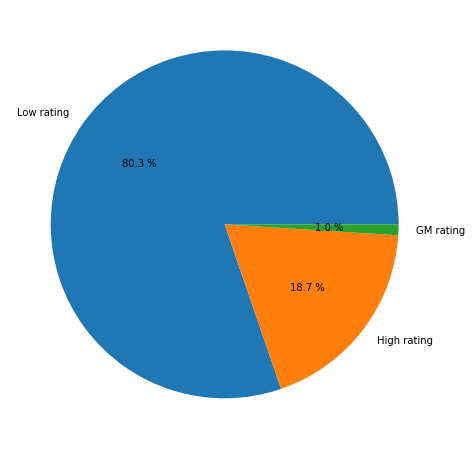

In [ ]:
Negras = (df2[df2['Categoria_Negras'] == 'Low rating']['Categoria_Negras'].count() ,df2[df2['Categoria_Negras'] == 'High rating']['Categoria_Negras'].count() ,df2[df2['Categoria_Negras'] == 'GM rating']['Categoria_Negras'].count() )
NombreN = ('Low rating','High rating','GM rating')
plt.figure(figsize=(8,8))
plt.pie(Negras,labels=NombreN, autopct="%0.01f %%")

Como podemos observar, la distribución de jugadores por tipo de categoría es prácticamente la misma, aproximadamente un 80% de los jugadores están en "Low rating", un 18-19% está en "High rating" y solamente un 1% está en "GM rating", por lo que se puede decir que llegar a las grandes ligas del ajedrez es realmente dificil. Naturalmente nos interesaría ver la distribución del "Elo" de los jugadores, para esto, usamos una gráfica de lineas:

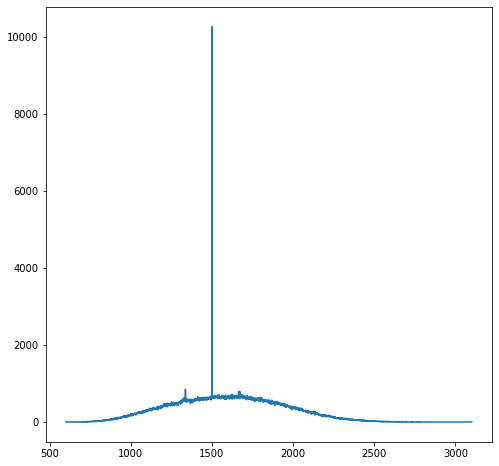

In [ ]:
plt.figure(figsize=(8,8))
df2['WhiteElo'].value_counts().sort_index().plot.line()

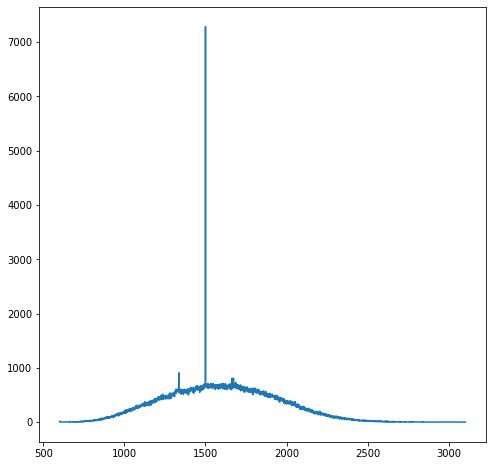

In [ ]:
plt.figure(figsize=(8,8))
df2['BlackElo'].value_counts().sort_index().plot.line()

Vemos que tanto para blancas como para negras, tienen un mismo comportamiento. Pareciese una curva, pero hay un gran salto con una linea vertical muy marcada, aproxiamdamente en el "Elo" de 1500 puntos, por lo que podría ser una zona de estancamiento para la mayoría de los jugadores, una barrera para su progreso. Hay que tener en cuenta que, en los siguientes análisis, los haremos dependiendo de la categoría de las Blancas, debido a que el "Low rating" puede sesgar algunos datos y que nuestra población de interés son las Blancas. Con lo anterior, Ahora nos interesaría saber los resultados de los juegos:

([<matplotlib.patches.Wedge at 0x7fb6be6e8390>,
 [Text(0.096682061963809, 1.0957429346769372, '0-1'),
  Text(-0.19697424252640713, -1.0822204709675143, '1-0'),
  Text(1.0953386577101951, -0.1011594035452381, '1/2-1/2'),
  Text(1.0999999979538053, -6.709417698630494e-05, '*')],
 [Text(0.052735670162077634, 0.5976779643692384, '47.2 %'),
  Text(-0.10744049592349479, -0.5903020750731895, '49.9 %'),
  Text(0.5974574496601063, -0.05517785647922078, '2.9 %'),
  Text(0.5999999988838937, -3.6596823810711786e-05, '0.0 %')])

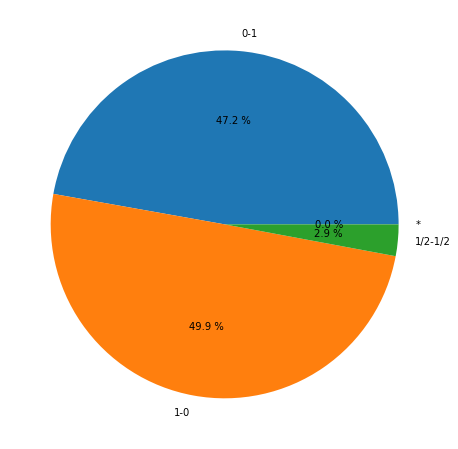

In [ ]:
Res = (df2[df2['Resultado'] == '0-1']['Resultado'].count() ,df2[df2['Resultado'] == '1-0']['Resultado'].count() ,df2[df2['Resultado'] == '1/2-1/2']['Resultado'].count(),df2[df2['Resultado'] == '*']['Resultado'].count())
NombreR = ('0-1','1-0','1/2-1/2','*')
plt.figure(figsize=(8,8))
plt.pie(Res,labels=NombreR, autopct="%0.01f %%")

En este caso, al hacerlo por categoría, nos dá una gráfica similar a hacerlo en general, por lo que nos quedaremos con esta por practicidad. Analizando la gráfica, las Blancas tienen casi un 50% de tasa de victoria, las Negras tienen un 47% aproximadamente, hay 2.9% de veces que hay empates y prácticamente un 0% de las veces no hay un resultado claro, por lo que se podría considerar el eliminar esa fila, por ahora la mantendremos. Ahora veremos la modalidad de juego favorita de los jugadores:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


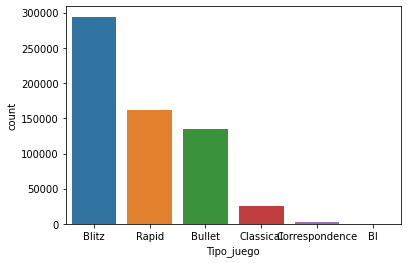

In [ ]:
sns.countplot(df2['Tipo_juego'])

En general, el Blitz, Rapid y Bullet dominan esta categoría de modalidad de juego favorito, mientras que el clásico, B1 y por correspondencia son menos agradables, esto puede deberse a que, los primeros lugares, son modalidades que se caracterizan por la rapidez en la que se juega, es decir, tienen tiempos cortos de juego, comparados con juegos clásicos o por correspondencia, donde pueden tardar hasta horas jugando. Ahora, nos interesa ver como se distribuye conforme a la categoría de las Blancas:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


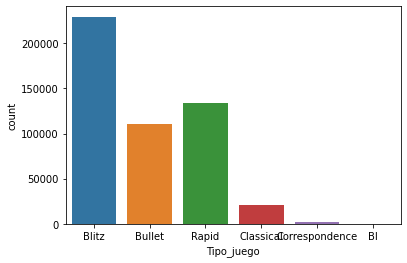

In [ ]:
sns.countplot(df2['Tipo_juego'][df2['Categoria_Blancas']=='Low rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


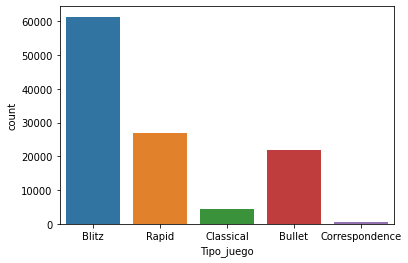

In [ ]:
sns.countplot(df2['Tipo_juego'][df2['Categoria_Blancas']=='High rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


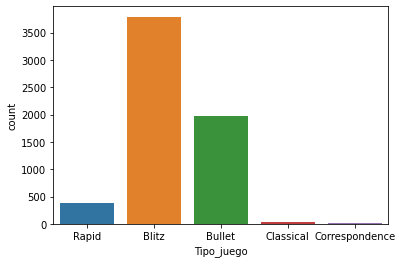

In [ ]:
sns.countplot(df2['Tipo_juego'][df2['Categoria_Blancas']=='GM rating'])

En general, tanto "Low rating" como "High rating" se distribuyen de forma similar a la 1ra gráfica de barras, pero en "GM rating", esto cambia, ya que el Bullet parece dominar con claridad ante el Rapid. Viendo ya los resultados y las modalidades de juego mas jugadas, ahora veremos como es que terminan estos juegos:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


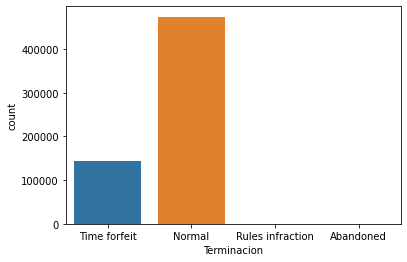

In [ ]:
sns.countplot(df2['Terminacion'])

Vemos que, en su mayoría, terminan de forma normal, es decir, uno se rinde, hay algún "Jaque mate" o acuerdan las "Tablas". Después está el "Time forfeit", que hace referencia a cuando un jugador se queda sin tiempo en el reloj. Por último, los abandonos y perder por alguna infracción son casos realmente extraños. Una vez visto como se comporta nuestra base de datos, veamos información que nos ayude on el objetivo general, viendo las aperturas más jugadas por categoría de las Blancas:

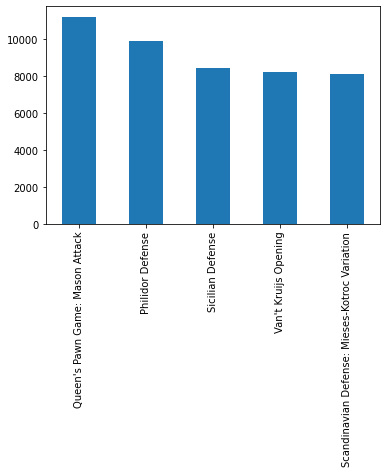

In [ ]:
df2['Apertura'][df2['Categoria_Blancas']=='Low rating'].value_counts().head(5).plot.bar()

Vemos que la favorita de los jugadores de "Low rating" es el ataque de Manson, seguida de 3 tipos de defensas y la apertura de Vant's, por lo que, en general, el blanco no le gusta atacar.

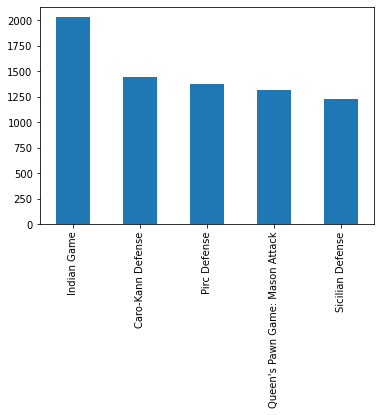

In [ ]:
df2['Apertura'][df2['Categoria_Blancas']=='High rating'].value_counts().head(5).plot.bar()

En cuanto los jugadores de "High rating", el Ataque de Manson baja posiciones, ganando el "Juego Indio", la cual es una apertura defensiva. Además, hay 3 defensas por debajo de esta apertura, y solo una apertura de atauqe, por lo que los jugadores de "High rating" juegan un poco más a la defensiva que los de "Low rating", ¿pasará lo mismo con la élite del ajedrez?

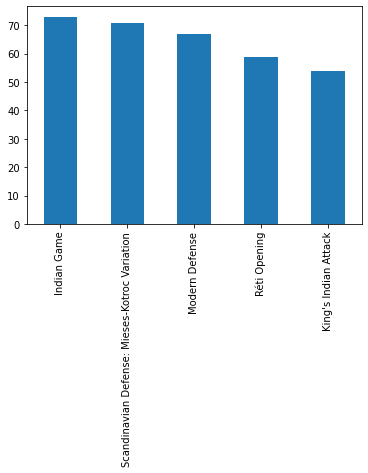

In [ ]:
df2['Apertura'][df2['Categoria_Blancas']=='GM rating'].value_counts().head(5).plot.bar()

Vemos ahora que las aperturas de "ataque" son menos populares en este "elo", mientras que las aperturas de "defensa" son más jugadas. Se puede deir que, mientras más bueno sea el jugador, toma una posición más defensiva contra su rival (jugador de Negras).

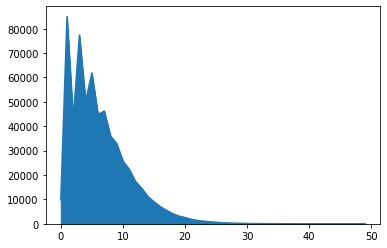

In [ ]:
df2['Juego_Vueltas'].value_counts().sort_index().plot.area()

Con esto vemos que, en general, hay menos de 10 momentos de "Volteo de juego", por o que los partidos mas emocionantes, donde es casi imposible saber quien realmente puede ganar debido a la gran cantidad de cambios de ventajas, son muy atípicos o poco comunes.

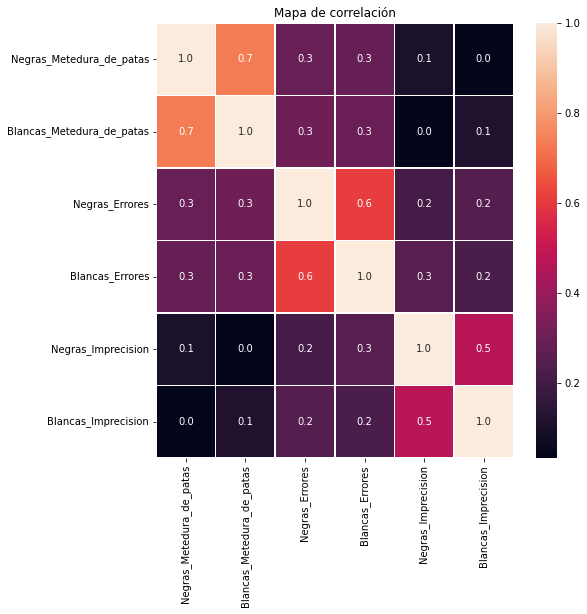

In [ ]:
f,ax=plt.subplots(figsize = (8,8))
sns.heatmap(df2[['Negras_Metedura_de_patas','Blancas_Metedura_de_patas','Negras_Errores','Blancas_Errores','Negras_Imprecision','Blancas_Imprecision']].corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

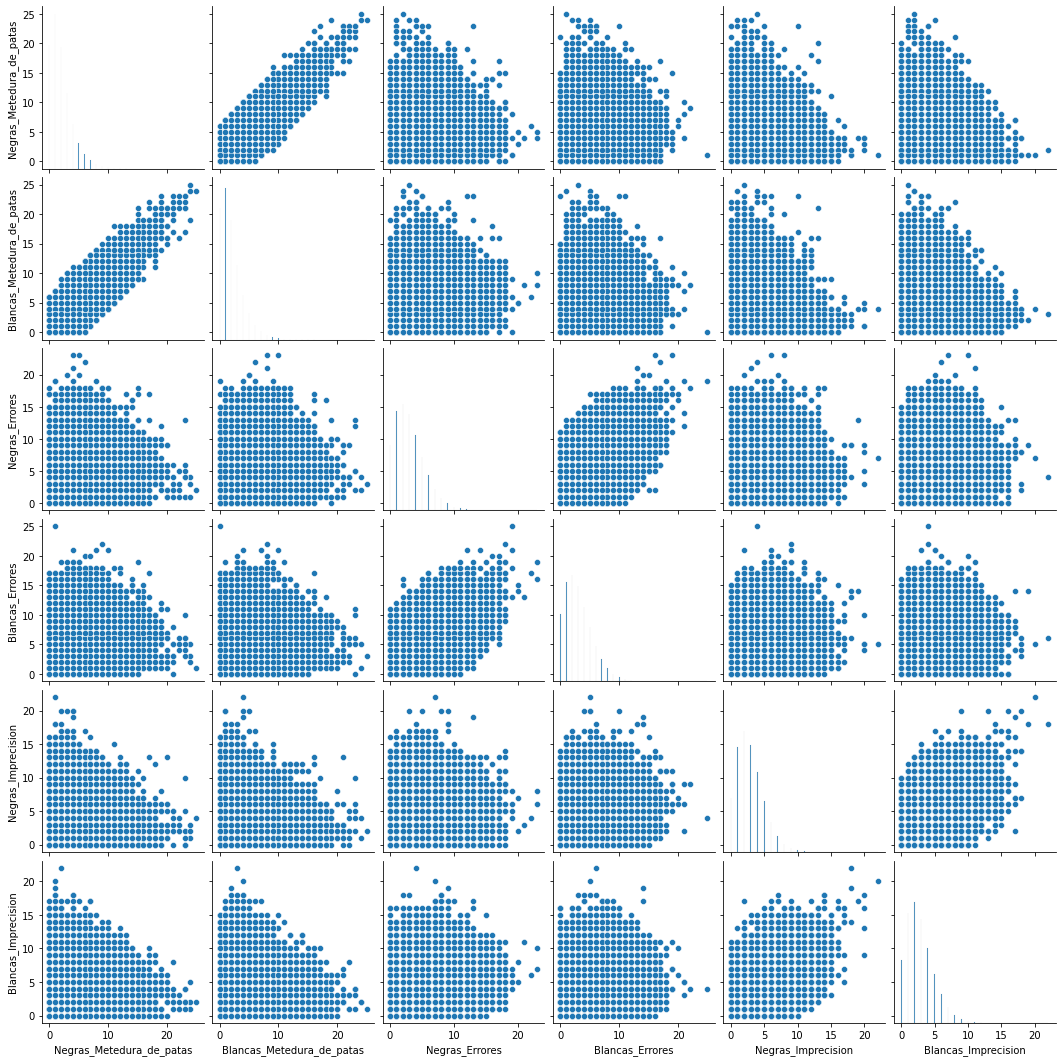

In [ ]:
sns.pairplot(df2[['Negras_Metedura_de_patas','Blancas_Metedura_de_patas','Negras_Errores','Blancas_Errores','Negras_Imprecision','Blancas_Imprecision']])

Por último, vemos que el error de "Metedura de pata" aparenta tener una relación lineal con los jugadores. Se puede decir entonces que, la cantidad de "Meteduras de pata" de tu rival puede depender de las "Meteduras de pata" que hayas hecho, o que uno puede cometer ciertas "Meteduras de pata" dependiendo de las cometidas por el rival.  
En resumen, la mayoria de las personas están en "Low rating", jugadores nuevos o gente que lo hace por hobbie, y llegar a "GM rating" es realmente una hazaña, y que hay un bloqueo en el "elo" de 1500 puntos, el cual puede ser una barrera que los jugadores debe superar si se quiere realmente mejorar, un tipo de filtro entre jugadores casuales y los que pueden aspirar a la grandeza. Además, el juego favorito de todos es la modalidad de Blitz, el cual premia la velocidad de los jugadores, por lo que dominar una apertura es tema crucial para la victoria. Por otro lado, podemos ver una tendencia de jugar de forma más defensiva conforme uno consigue mas "elo", es decir, se vuelve mejor jugador, pero ¿son realmente efectivas?. Además, se percibe una relación lineal entre las "Meteduras de pata" de los jugadores de Negras y Blancas, lo cual puede ser interesante de analizar.


**NOTAS TÉCNICAS**  
(Futuro)